In [ ]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Optimizando el hiper parámetro $\alpha$ 

Habrán notado que en el ejemplo anterior seteamos el _hiperparámetro_ $\alpha$ en 0.5. Esta fue una decisión arbitraria, y existen maneras de determinar este valor empíricamente.

En general, debemos decidir la forma de elegir el parámetro $\alpha$ y existen formas automáticas de hacerlo. Una forma de hacerlo es con _validacion-cruzada_ o _cross-validation_ en inglés. Para esta práctica guiada, exploremos el ridge model que viene con funcionalidad para hacer [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Típicamente, el cross-validation funciona separando nuestro dataset entre datos para ajustar el modelo (training set) y datos para evaluar el modelo (testing set).

En este caso, el modelo que generamos con `RidgeCV` de scikit-learn, automáticamente prueba diferentes valores de $\alpha$. Ejecutá el siguiente código más de una vez. Deberías ver que elije diferentes valores de $\alpha$, ya que hace diferentes separaciones de los datos cada vez.
### Tomamos la misma función de la notebook anterior:

In [1]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 6,6

random.seed(5)

# Generamos un dataset de ejemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3 * random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    
    return xs, ys


In [2]:
xs1, ys1 = generate_data()
xs2, ys2 = generate_data()

In [3]:
xs1, ys1

([-7.868705084669106,
  -6.8273508513311505,
  -2.087015684850844,
  -1.9469236594107726,
  0.5927928566535088,
  2.2781764362156975],
 [11.520909484008026,
  4.5474606036694905,
  0.13576647035349249,
  -0.3059619276753641,
  0.4018123953876509,
  4.346247756315739])

In [4]:
xs2, ys2

([-6.838447098033331,
  -4.478812637074115,
  -3.85235756139835,
  -2.614214234172846,
  -0.9472633264777759,
  1.1155660331497494],
 [12.84492507036041,
  8.17349302153334,
  1.3776482144114437,
  -0.13540171860489222,
  -2.0850943533337247,
  1.0238138375280563])

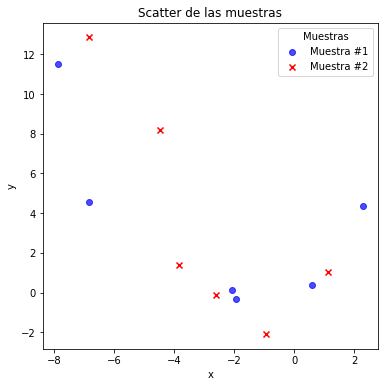

In [5]:
# plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.scatter(xs1, ys1, marker='o', color='blue', label='Muestra #1', alpha=0.7)
ax.scatter(xs2, ys2, marker='x', color='red', label ='Muestra #2', alpha=1)

# fig.suptitle('Gráfico de las muestras')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Scatter de las muestras')

# ax.set_xlim(-1,11)
# ax.set_ylim(-1.5, 2.5)

# con axes.legend() levantamos los argumentos label de axes.plot
ax.legend(loc = 'upper right', title = 'Muestras', frameon=True);

### Ridge CV (Cross Validation)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html


In [6]:
# instanciamos un modelo 
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=3, normalize=True,scoring='r2')

In [7]:
# Ajustamos nuestro modelo con RidgeCV
X = xs1
y = ys1
rlmcv.fit(X, y)

C:\Users\jmstefanich\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jmstefanich\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jmstefanich\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\jmstefanich\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\jmstefanich\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users

ValueError: Expected 2D array, got 1D array instead:
array=[-7.86870508 -6.82735085 -2.08701568 -1.94692366  0.59279286  2.27817644].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

***Qué pasó?. Ver el mensaje de error***

ValueError: Expected 2D array, got 1D array instead:
array=[-7.86870508 -6.82735085 -2.08701568 -1.94692366  0.59279286  2.27817644].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [ ]:
xs1

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

RidgeCV necesita que x sea un "ndarray of shape (n_samples, n_features)"

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [8]:
np.array(xs1).shape

(6,)

In [9]:
# Volvemos a armar X e y
X = np.array(xs1).reshape(-1, 1)
y = ys1

X ; X.shape

(6, 1)

alpha: 0.1
beta0: 1.7449855648112444
beta1: [-0.6416738]


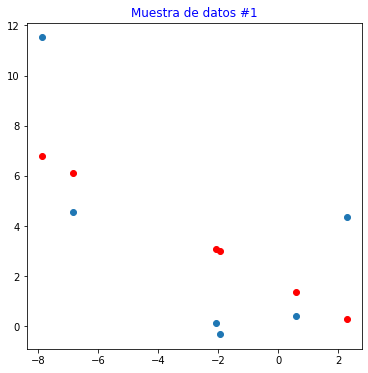

r^2: 0.39077424255587834


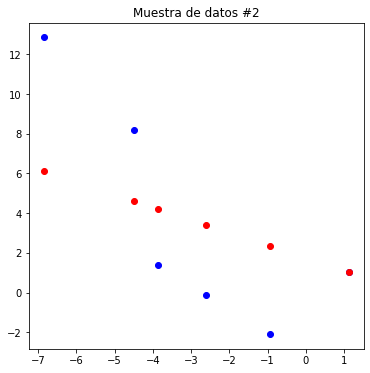

r^2: 0.4025895798973629


In [10]:
# Ajustamos nuevamente nuestro modelo con RidgeCV
rlmcv.fit(X, y)
print ("alpha:", rlmcv.alpha_)
print ("beta0:", rlmcv.intercept_)
print ("beta1:", rlmcv.coef_)


predictions = rlmcv.predict(X)

plt.scatter(xs1, ys1)
plt.title("Muestra de datos #1", c='b')
plt.scatter(xs1, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys1))

X = np.array(xs2).reshape(-1,1)
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2, c='b')
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

Si para el mismo set de datos, quiero ver que puede dar valores algo distintos, debería asegurarme de que arme los folds de manera distinta cada vez. Eso puedo hacerlo variando la semilla con la cual se generan los folds, forzándolo mediante una función extern llamada KFolds

In [20]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=3, shuffle=True, random_state=192)
# instanciamos un modelo 
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=kfolds, normalize=True,scoring='r2')

In [21]:
# Volvemos a armar X e y
X = np.array(xs1).reshape(-1, 1)
y = ys1

X ; X.shape

(6, 1)

alpha: 0.1
beta0: 1.7449855648112444
beta1: [-0.6416738]


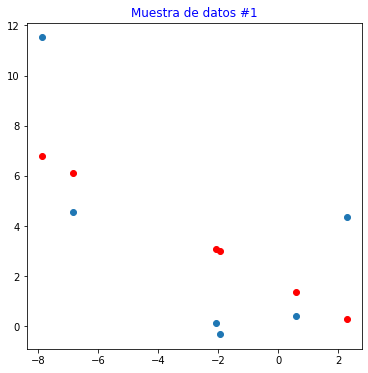

r^2: 0.39077424255587834


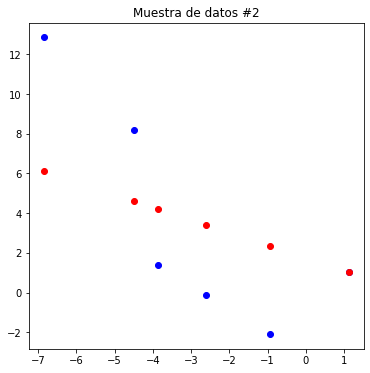

r^2: 0.4025895798973629


In [22]:
# Ajustamos nuevamente nuestro modelo con RidgeCV
rlmcv.fit(X, y)
print ("alpha:", rlmcv.alpha_)
print ("beta0:", rlmcv.intercept_)
print ("beta1:", rlmcv.coef_)


predictions = rlmcv.predict(X)

plt.scatter(xs1, ys1)
plt.title("Muestra de datos #1", c='b')
plt.scatter(xs1, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys1))

X = np.array(xs2).reshape(-1,1)
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2, c='b')
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

### Lasso
Ojo corregir que varía el set de datos cada vez, no los folds

In [23]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=3, shuffle=True, random_state=12)


In [24]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=kfolds, normalize=True)

#lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=kfolds, normalize=True, max_iter= 10000)


alpha: 1.6114414414414413
beta0: 3.441039130343172
beta1: [-0.]


r^2: 0.0


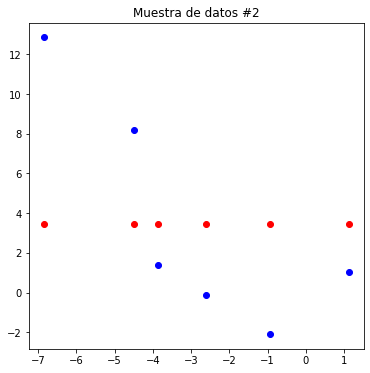

r^2: -0.00031055576190919254


In [25]:
# Si cada vez genero distintos sets, va a dar distinto, pero no porque elija folds distintos
#xs, ys = generate_data()


# Ajustamos nuevamente nuestro modelo, esta vez con LassoCV
#X = np.vander(xs, 4)[:,:-1]
X = np.array(xs1).reshape(-1, 1)
y = ys1
lassocv.fit(X, y)

print ("alpha:", lassocv.alpha_)
print ("beta0:", lassocv.intercept_)
print ("beta1:", lassocv.coef_)


predictions = lassocv.predict(X)

plt.scatter(xs1, ys1, c='b')
plt.title("Muestra de datos #1")
plt.scatter(xs1, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys1))
#print ("alpha:", lassocv.alpha_)

#X = np.vander(xs2, 4)[:,:-1]
X = np.array(xs2).reshape(-1, 1)
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2, c='b')
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))

¿Que paso con Lasso? ¿Porque no alcanza convergencia?

## Para ampliar

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
    
https://pythonquestion.com/post/lasso-on-sklearn-does-not-converge/    